## Fetching Dataset

In [37]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [38]:
x,y = mnist["data"], mnist['target']

In [39]:
x.shape

(70000, 784)

In [40]:
y.shape

(70000,)

In [41]:
%matplotlib inline

In [42]:
import matplotlib
import matplotlib.pyplot as plt

In [43]:
import numpy as np
some_digit = np.array(x.iloc[36001])
some_digit_image = some_digit.reshape(28,28)#lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

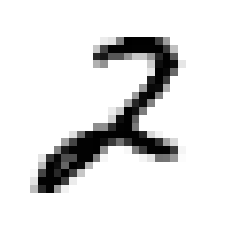

In [44]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [45]:
y[36001]

'2'

In [46]:
x_train, x_test = x[:60000], x[60000:70000]

In [47]:
y_train, y_test = y[:60000], y[60000:70000]

In [48]:
shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

## Creating a 2 detector

In [49]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [50]:
y_train

43626    4
49473    1
9486     6
11668    9
27548    2
        ..
27219    7
37708    0
9031     2
5708     1
31248    8
Name: class, Length: 60000, dtype: int8

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(tol = 0.1)

In [53]:
clf.fit(x_train,y_train_2)

/Users/ads-7/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [54]:
clf.predict([some_digit])

array([ True])

In [55]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train , y_train_2, cv = 3, scoring="accuracy")

/Users/ads-7/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ads-7/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [56]:
a

array([0.97855, 0.97875, 0.97835])

In [57]:
a.mean()

0.9785499999999999

In [58]:

import numpy as np


In [59]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

## SVM Classification

In [60]:
from sklearn.svm import SVC
classifier2 = SVC()

In [61]:
classifier2 = classifier2.fit(np.array(x).reshape(x.shape[0], 28*28), y)
y_pred2 = classifier2.predict(np.array(x_test).reshape(x_test.shape[0],28*28))

## Results

In [62]:
import joblib
joblib.dump(classifier2, 'SVC_model.gzip', compress=('gzip',3))

['SVC_model.gzip']

In [63]:
from tkinter import * 
import tkinter as tk
from PIL import Image, ImageGrab, ImageOps
import numpy as np
import joblib

In [64]:
classifier2 = joblib.load('SVC_model.gzip')

In [65]:
class GUI(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.canvas_width = 200
        self.canvas_height = 200
        self.bg_color = "White"
        self.paint_color = "black"
        self.radius = 5
        self.init_canvas()
        
    def init_canvas(self):
        self.canvas = Canvas(self, width=self.canvas_width, height=self.canvas_width, bg = self.bg_color, cursor="cross")
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.button_predict = tk.Button(self, text = "Predict", command = self.predict)
        self.label_digit = tk.Label(self, text="", font=("Helvetica"))
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.button_clear.grid(row=1, column=0, pady=2)
        self.button_predict.grid(row=1, column=1, pady=2)
        self.label_digit.grid(row=0, column=1, padx=2, pady=2)
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x1, y1 = (event.x - self.radius), (event.y - self.radius)
        x2, y2 = (event.x + self.radius), (event.y + self.radius)
        self.canvas.create_oval(x1, y1, x2, y2, fill=self.paint_color, outline=self.paint_color)

    def clear_all(self):
        self.canvas.delete("all")
    
    def preprocess(self):
        fileName = 'canvas_paint'
        
        # Find Canvas Coordinates
        x = self.canvas.winfo_x() + self.winfo_x() + 52
        y = self.canvas.winfo_y() + self.winfo_y() + 77
        x1 = x + self.canvas_width
        y1 = y + self.canvas_height
        
        # Screenshot and Save Image in Canvas
        img = ImageGrab.grab().crop((x,y,x1,y1))
        img = img.convert('RGB')
        img.save(fileName + ".jpg")
        
        # Invert Image
        img = ImageOps.invert(img)
        img.save(fileName + "_negative" + ".jpg")
        
        # Resize and convert it into greyscale
        img = img.resize((28,28))
        img = img.convert('L')
        img.save(fileName + "_28x28" + ".jpg")
        
        # Convert it into Numpy array
        img = np.array(img)
        img = img.reshape(28*28)
        print("Pre Processing complete")
        return img
    
    def predict(self):
        img = self.preprocess()
        digit = classifier2.predict([img])
        self.label_digit.configure(text=str(digit))

In [66]:
app = GUI()
mainloop()